# 1. Setup

## 1.1 Installing Dependencies

In [2]:
!pip install tensorflow==2.17.1 opencv-python matplotlib

## 1.2 Import Dependencies

In [3]:
# import standard dependencies

import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Importing tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


## 1.3 Set GPU Growth (Skipping cause we're not doing GPU stuff)

## 1.4 Creating Folder Structures

In [5]:
# Setting up Paths

POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# 2. Collecting Positives and Anchors

## 2.1 Downloading kaggle, importing and unzipping the dataset

In [5]:
!kaggle datasets list


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!kaggle datasets download -d jessicali9530/lfw-dataset


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import zipfile

with zipfile.ZipFile("lfw-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("lfw-dataset")


FileNotFoundError: [Errno 2] No such file or directory: 'lfw-dataset.zip'

In [15]:
#Moving LFW Images to the following repository data/negative


In [13]:
for directory in os.listdir('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled'):
    for file in os.listdir(os.path.join('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled', directory)):
        EX_PATH = os.path.join('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Bhargav Anand\AppData\Local\Temp\ipykernel_5308\1230458322.py:1: SyntaxWarning: invalid escape sequence '\l'
  for directory in os.listdir('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled'):
C:\Users\Bhargav Anand\AppData\Local\Temp\ipykernel_5308\1230458322.py:2: SyntaxWarning: invalid escape sequence '\l'
  for file in os.listdir(os.path.join('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled', directory)):
C:\Users\Bhargav Anand\AppData\Local\Temp\ipykernel_5308\1230458322.py:3: SyntaxWarning: invalid escape sequence '\l'
  EX_PATH = os.path.join('lfw-dataset\lfw-deepfunneled\lfw-deepfunneled', directory, file)


## 2.2 Collecting Positive and Anchor Classes

In [6]:
#Importing uuid library to generate unique image names
#uuid: universally unique identifiers
import uuid

In [7]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\d73ddcde-19a1-11f0-ab0e-10a51d993350.jpg'

In [10]:
#Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #Adding this solely bcoz this stupid thing is mirroring my camera
    frame = cv2.flip(frame, 1)

    #Over here we're just configuring our image to 250x250 (the section after the colon)
    #But we need to put 120 and 200 as the starting points for the x and y axis (redefining the origin)
    #or else we'll get a corner of the actual picture as the captured frame
    frame = frame[120:120+250,200:200+250, :]

    #Collecting anchors when we press a
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #Creating a unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Writing out the anchor image
        cv2.imwrite(imgname, frame)

    #Collecting positives when we press p
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #Creating a unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #Writing out the anchor image
        cv2.imwrite(imgname, frame)

    #Show image back to screen
    cv2.imshow('Image Collection', frame)

    #Breaking || Also btw waitKey uses milliseconds as parameter || When we hit q, it will close our frame
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

#Release the webcam
cap.release()

#Close the image show frame
cv2.destroyAllWindows()

# 2.x UPDATED - Data Augmentation

In [11]:

def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

# 3.0 Loading and Preprocessing Images

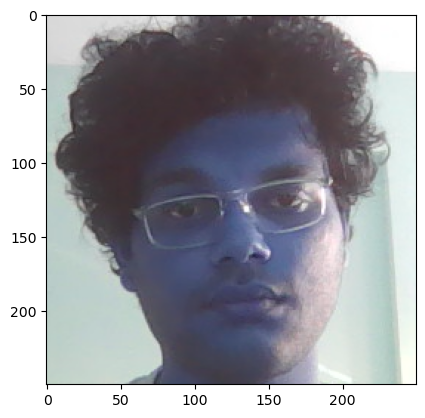

In [12]:

#plt.imshow is for showing the last captured frame after pressing q
plt.imshow(frame)

## 3.1 Get Image Directories

In [13]:
#Taking 270 image paths from every folder
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(2700)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(2700)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(2700)

<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:4: SyntaxWarning: invalid escape sequence '\*'
C:\Users\Admin\AppData\Local\Temp\ipykernel_2192\1847179628.py:2: SyntaxWarning: invalid escape sequence '\*'
  anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(2700)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2192\1847179628.py:3: SyntaxWarning: invalid escape sequence '\*'
  positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(2700)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2192\1847179628.py:4: SyntaxWarning: invalid escape sequence '\*'
  negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(2700)


In [15]:
dir_test = anchor.as_numpy_iterator()

In [16]:
print(dir_test.next())

b'data\\anchor\\88a0a1d5-1976-11f0-82c2-bf4f40fd0c3c.jpg'


## 3.2 Preprocessing - Scale and Resize

In [17]:

def preprocess(file_path):

    #reading in image from file path
    byte_img = tf.io.read_file(file_path)
    #loading in the image
    img = tf.io.decode_jpeg(byte_img)
    
    #Preprocessing steps - resizing the image to 100x100x3
    img = tf.image.resize(img, (100, 100))
    #Scaling image to be between 0 and 1
    img = img / 255.0

    #returning image (ofc lol)
    return img

In [18]:
preprocess('data\\anchor\\232cb953-1976-11f0-bccb-bf4f40fd0c3c.jpg')

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.43186274, 0.39754903, 0.39754903],
        [0.6379902 , 0.61960787, 0.59387255],
        [0.7764706 , 0.7745098 , 0.6696078 ],
        ...,
        [0.7372549 , 0.74509805, 0.6509804 ],
        [0.73946077, 0.7473039 , 0.65318626],
        [0.74607843, 0.75392157, 0.6598039 ]],

       [[0.34558824, 0.26838234, 0.26519608],
        [0.31176472, 0.27156863, 0.25735295],
        [0.36053923, 0.34191176, 0.3156863 ],
        ...,
        [0.7362745 , 0.74607843, 0.6490196 ],
        [0.74313724, 0.7529412 , 0.65588236],
        [0.74509805, 0.75392157, 0.65686274]],

       [[0.6458333 , 0.6379902 , 0.52230394],
        [0.4357843 , 0.4014706 , 0.31617647],
        [0.3389706 , 0.26397058, 0.25      ],
        ...,
        [0.7343137 , 0.7529412 , 0.6382353 ],
        [0.74338233, 0.7620098 , 0.64730394],
        [0.74607843, 0.7607843 , 0.654902  ]],

       ...,

       [[0.54264706, 0.535049  , 0.54289216],
        [0.43

In [19]:
img = preprocess('data\\anchor\\232cb953-1976-11f0-bccb-bf4f40fd0c3c.jpg')


In [20]:
img.numpy().max()

0.9977941

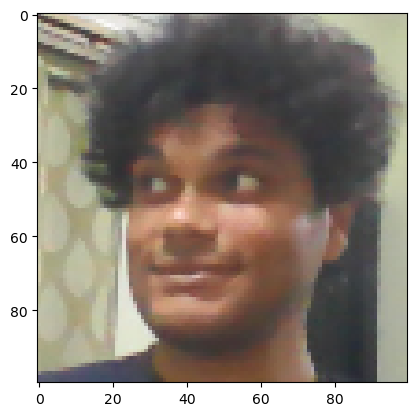

In [21]:
plt.imshow(img)

## 3.3 Create Labelled Dataset

In [22]:
#(anchor, positive) => 1,1,1,1,1
#(anchor, negative) => 0,0,0,0,0

In [23]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [24]:
samples = data.as_numpy_iterator()

In [25]:
example = samples.next()

#it shows the path to the +ve and the anchor images
#the '1.0' at the end shows it is a +ve example
#rn its not shuffled so we'll have to run this till we run out of +ves and then we'll get -ves
#We'll shuffle it later

## 3.4 Building Train and Test Partition

In [26]:
#just returning the loaded preprocessed img 
#in the return statement, input_img is the anchor
#validation img can be either a +ve or a -ve
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

In [27]:
#star is for unpacking the image - saves us from iterating and unpacking each image
preprocess_twin(*example)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.11642157, 0.1242647 , 0.1125    ],
         [0.13627452, 0.13799019, 0.12205882],
         [0.2855392 , 0.29632354, 0.2252451 ],
         ...,
         [0.44289216, 0.4644608 , 0.33014706],
         [0.4617647 , 0.47745097, 0.33431372],
         [0.47230393, 0.4879902 , 0.3507353 ]],
 
        [[0.12671569, 0.1247549 , 0.1257353 ],
         [0.13970588, 0.14068627, 0.12892157],
         [0.34166667, 0.35710785, 0.29558823],
         ...,
         [0.4254902 , 0.44632354, 0.3154412 ],
         [0.46960783, 0.4852941 , 0.3485294 ],
         [0.47377452, 0.4776961 , 0.34436274]],
 
        [[0.14681372, 0.13014705, 0.14289215],
         [0.1392157 , 0.14019608, 0.13529412],
         [0.39191177, 0.4132353 , 0.3612745 ],
         ...,
         [0.41715688, 0.43480393, 0.31617647],
         [0.46642157, 0.48210785, 0.34681374],
         [0.48431373, 0.4882353 , 0.35490197]],
 
        ...,
 
        [[0.87058824, 0.872549  

In [28]:
#since we have 3 sections in the result, lets check each- 
#i.e., anchor (input_img), (validation_img - could be +ve or -ve),
#and finally, label => 0 or -ve, 1 for +ve
result = preprocess_twin(*example)

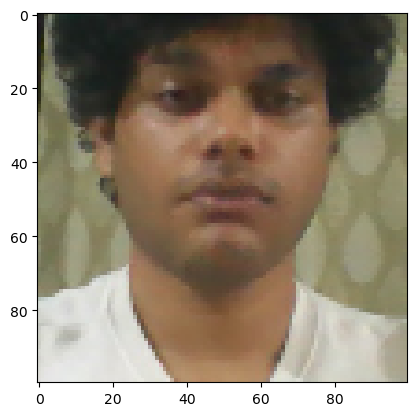

In [29]:
#input_img -> anchor
plt.imshow(result[0])

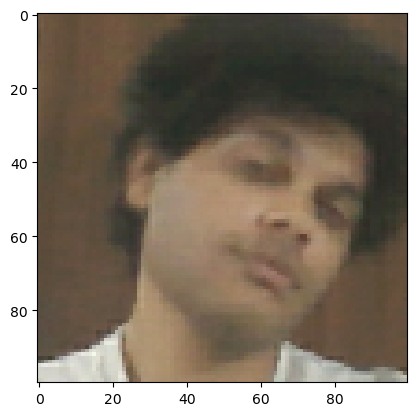

In [30]:
#validation_img
plt.imshow(result[1])

In [31]:
#label
result[2]

1.0

In [32]:
# Building dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()

#shuffling the images (as we said we'd do earlier)
#now the next time we iterate through images, it should throw a -ve image once in a while
data = data.shuffle(buffer_size=10000)

In [33]:
samples = data.as_numpy_iterator()

In [34]:
samp = samples.next()

In [35]:
#Now re-doing the earlier steps => checking anchor image, validation image, and label

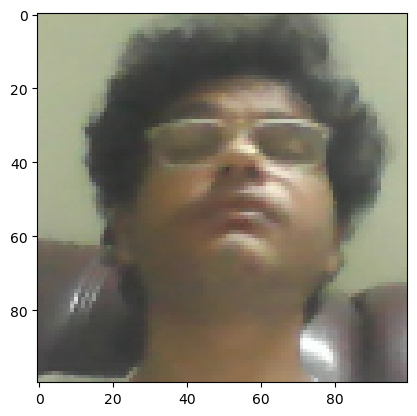

In [36]:
plt.imshow(samp[0])

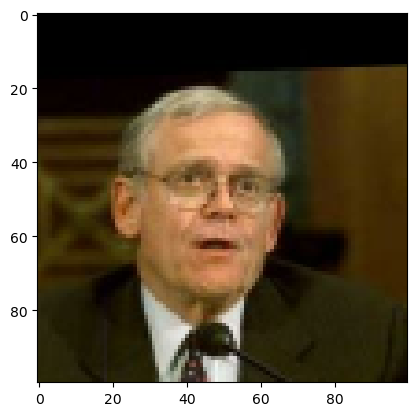

In [37]:
#FINALLY it took a -ve image
plt.imshow(samp[1])

In [38]:
#label will be 0 this time
samp[2]

0.0

In [102]:
#Training Partition

#We're taking 70% of all the data to make the partition
train_data = data.take(round(len(data)*.7))
#Batching the data with 16 images each
train_data = train_data.batch(16)
#preprocessing the next set of images so we don't bottleneck while training
train_data = train_data.prefetch(8)

In [103]:
train_samples = train_data.as_numpy_iterator()

In [104]:
train_sample = train_samples.next()

In [105]:
#The length is now 16
#this shows that now we don't just take 1 image at a time.
len(train_sample[0])

16

In [106]:
#Testing partition

#skipping the first 70% of data so we don't take our training sample
test_data = data.skip(round(len(data)*.7))
#using the last 30% for testing
test_data = test_data.take(round(len(data)*.3))

#Batching this data as well
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Building the Embedding Layer (where the comparison b/w anchor and validation image happens)

Checking everything to be used in make_embedding function

In [107]:
inp = Input(shape=(105, 105, 3), name='input_image')

In [108]:
inp

<KerasTensor shape=(None, 105, 105, 3), dtype=float32, sparse=False, ragged=False, name=input_image>

In [109]:
 c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [110]:
c1

<KerasTensor shape=(None, 96, 96, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_26>

In [111]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [112]:
m1

<KerasTensor shape=(None, 48, 48, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_27>

In [113]:
c2 = Conv2D(128, (7,7), activation='relu')(m1) 
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [114]:
c2

<KerasTensor shape=(None, 42, 42, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_28>

In [115]:
m2

<KerasTensor shape=(None, 21, 21, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_29>

In [116]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [117]:
c3

<KerasTensor shape=(None, 18, 18, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_30>

In [118]:
m3

<KerasTensor shape=(None, 9, 9, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_31>

In [119]:
c4 = Conv2D(256, (4,4), activation='relu')(m3) #256 filter with a shape of 4x4
f1 = Flatten()(c4) #flattening all the layers of the convolution into a single dimension
d1 = Dense(4096, activation='sigmoid')(f1)

In [120]:
c4

<KerasTensor shape=(None, 6, 6, 256), dtype=float32, sparse=False, ragged=False, name=keras_tensor_32>

In [121]:
f1 #note that output will be 9216 = 6x6x256

<KerasTensor shape=(None, 9216), dtype=float32, sparse=False, ragged=False, name=keras_tensor_33>

In [122]:
d1

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_34>

In [123]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [124]:
mod.summary() #Note how the output shapes match the paper diagram

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 105, 105, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 42, 42, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# Using all that stuff above. Check the paper diagram
# note that we'll use 100x100 here instead of 105x105. So the output will be
# slightly different. But the ending dense layer will be 4096
# that's all that matters
def make_embedding():
    inp = Input(shape=(100, 100, 3), name='input_image')

    #First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    #Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1) #128 filters with a shape of 7x7
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2) #64 units with a shape of 2x2

    #Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    #Final embedding block: convolution, flattening, and dense layer
    c4 = Conv2D(256, (4,4), activation='relu')(m3) #256 filter with a shape of 4x4
    f1 = Flatten()(c4) #flattening all the layers of the convolution into a single dimension
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=inp, outputs=d1, name='embedding')

In [126]:
embedding = make_embedding()

In [127]:
embedding.summary() #note how the outputs are slightly diff to 105x105

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
#Now in the Siamese distance layer, we'll subtract the two images. 
#That will tell us how similar they are to each other

## 4.2 Building the Distance Layer

In [129]:
#Siamese L1 Distance class
class L1Dist(Layer):

    #__init__ method for inheritance
    #self is bcoz we r working on self for this model
    #**kwargs (keyword argument) helps u work with a layer as a part of a larger model
    def __init__(self, **kwargs):
        super().__init__()

    #returning the absolute value after subtraction (similarity calculation)
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [130]:
l1 = L1Dist()

## 4.3 Making Siamese Model

In [131]:
#Again, checking each section of the function make_siamese_model

In [132]:
input_image = Input(name = 'input_img', shape=(100,100,3))
validation_image = Input(name = 'validation_img', shape=(100,100,3))

In [133]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [134]:
inp_embedding

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_44>

In [135]:
val_embedding

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_45>

In [136]:
siamese_layer = L1Dist()

In [137]:
distances = siamese_layer(inp_embedding, val_embedding)

In [138]:
classifier = Dense(1, activation='sigmoid')(distances)

In [139]:
classifier #note how the output has shape 1 => (1x1) as given in the paper diagram

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_47>

In [140]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [141]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_4 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
def make_siamese_model():
    # Ensure unique input names
    input_image = Input(name='anchor_image', shape=(100, 100, 3))
    validation_image = Input(name='validation_image', shape=(100, 100, 3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distance = siamese_layer(embedding(input_image), embedding(validation_image))
    # distances will have a shape of 4096

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distance)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [143]:
#Create the model
siamese_model = make_siamese_model()

In [144]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_image        │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ anchor_image[0][… │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_5 (L1Dist)  │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# Training

## 5.1 Setup Loss and Optimizer

In [145]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [146]:
#Check optimizers for keras
#popular ones include: SGD, RMSprop, Adam, Nadam, Adagrad, etc. 
#we're using Adam
opt = tf.keras.optimizers.Adam(1e-4) #1e-4 = 0.0001

## 5.2 Establish Checkpoints

In [147]:
#defining a directory to save our checkpoints
checkpoint_dir = './training_checkpoints'

#rprefixing all of our checkpoint with 'ckpt'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')

#saving optimizer using 'opt = opt'. same for model
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model = siamese_model)

## 5.3 Building Train Step Function

In [148]:
test_batch = train_data.as_numpy_iterator()

In [149]:
batch_1 = test_batch.next()

In [150]:
#has 3 components (len):
batch_1

(array([[[[0.11519608, 0.11519608, 0.10735294],
          [0.12230392, 0.12230392, 0.12818627],
          [0.12401961, 0.12696078, 0.10147059],
          ...,
          [0.5855392 , 0.60514706, 0.4875    ],
          [0.59289217, 0.6066176 , 0.48602942],
          [0.595098  , 0.6068627 , 0.4852941 ]],
 
         [[0.11960784, 0.11960784, 0.11176471],
          [0.12720588, 0.11887255, 0.12279411],
          [0.1370098 , 0.13308823, 0.10857843],
          ...,
          [0.589951  , 0.6017157 , 0.48161766],
          [0.59068626, 0.6009804 , 0.47867647],
          [0.58455884, 0.5973039 , 0.46838236]],
 
         [[0.1125    , 0.1125    , 0.10465686],
          [0.12843138, 0.11862745, 0.12254902],
          [0.14656863, 0.13333334, 0.11789215],
          ...,
          [0.5855392 , 0.5892157 , 0.4757353 ],
          [0.60808825, 0.6125    , 0.4879902 ],
          [0.57843137, 0.58235294, 0.4490196 ]],
 
         ...,
 
         [[0.8566176 , 0.8605392 , 0.8370098 ],
          [0.86470

In [151]:
#number of anchor images in the first part of the batch
len(batch_1[0])

16

In [152]:
#number of -ve/+ve images in the 2nd part of our batch
len(batch_1[1])

16

In [153]:
#labels
len(batch_1[2])

16

In [154]:
X = batch_1[:2]
np.array(X).shape

#the output means: 2 components(anchor and validation img, 16 instances of each component,
#each component in the shape of 100x100x3

(2, 16, 100, 100, 3)

In [155]:
y = batch_1[2]
y

#output shows the labels: few 1's, few 0's as expected

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

In [156]:
#tf.function compiles a function into a tensorflow graph (Read documentation)
@tf.function
def train_step(batch):

    #tf.GradientTape records operations for automatic differentiation (Read documentation)
    with tf.GradientTape() as tape: 

        #Get anchor and +ve/-ve img
        X = batch[:2]
        #Get label
        y = batch[2]

        #Forward pass
        yhat = siamese_model(X, training=True)
        #Calculating loss
        loss = binary_cross_loss(y, yhat)
        #y ~ ytrue and yhat ~ ypred (y predicted)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    #Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    #Here, the optimizer is calculating and propagating the new weights using Adam's 
    #optimization algorith, a variant of gradient descent

    return loss

## 5.4 Building Training Loop

How is it different from train_step?

train_step was focused on training one batch.
the loop here will be used to iterate over every batch in the dataset

In [164]:

# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [165]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Training the Model

In [166]:
EPOCHS = 50

In [167]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511m

# 6. Evaluating Model

- We'll be using Precision and Recall metrics 
- Precision: demonstrates what proportion of +ve identifications were actually correct
- Recall: Shows what proportion of actual positives were identified correctly

## 6.1 Import Metrics

In [168]:
#Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [169]:
#Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [170]:
test_var = test_data.as_numpy_iterator().next()

In [171]:
test_var

(array([[[[0.9112745 , 0.94142157, 0.8901961 ],
          [0.672549  , 0.6578431 , 0.6039216 ],
          [0.59166664, 0.5605392 , 0.4875    ],
          ...,
          [0.59705883, 0.60490197, 0.45931372],
          [0.5919118 , 0.5997549 , 0.44607842],
          [0.59313726, 0.60269606, 0.4406863 ]],
 
         [[0.9642157 , 0.9387255 , 0.91519606],
          [0.6757353 , 0.6276961 , 0.59607846],
          [0.7710784 , 0.7171569 , 0.67156863],
          ...,
          [0.59068626, 0.58504903, 0.4522059 ],
          [0.57843137, 0.5754902 , 0.4372549 ],
          [0.5683824 , 0.5654412 , 0.4252451 ]],
 
         [[0.91838235, 0.93602943, 0.8870098 ],
          [0.7232843 , 0.7289216 , 0.67941177],
          [0.8906863 , 0.89191175, 0.842402  ],
          ...,
          [0.5980392 , 0.5754902 , 0.44411764],
          [0.5852941 , 0.56642157, 0.4387255 ],
          [0.57058823, 0.5529412 , 0.42647058]],
 
         ...,
 
         [[0.48333332, 0.48308823, 0.3852941 ],
          [0.51691

In [172]:
len(test_var)

3

In [173]:
#test input 
#remove len to view the array of input images
len(test_var[0])

16

In [174]:
#validation data
#remove len to view the array of input images
len(test_var[1])

16

In [175]:
#labels
#remove len to view the array of input images
len(test_var[2])

16

In [176]:
y_true

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.],
      dtype=float32)

In [177]:
#Make predictions:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


array([[1.0000000e+00],
       [4.4845017e-08],
       [1.1843465e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.9117340e-08],
       [3.5853468e-08],
       [1.0000000e+00],
       [2.9376103e-08],
       [2.6510747e-07],
       [9.9999923e-01],
       [1.0000000e+00],
       [9.9999350e-01],
       [1.0000000e+00],
       [3.8016159e-07],
       [4.5794573e-07]], dtype=float32)

In [178]:
#Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

## 6.3 Calculate Metrics

In [179]:
#Creating a metric object
m = Recall()

#Updating the state (calculating the recall value)
m.update_state(y_true, y_hat)

#Returning recall result
m.result().numpy()

#Remember we're doing this test only for a single batch.
#Ideally we should test it for all batches
#If u wanna see if the model still works for a few more batches
#rerun the program from 6.2

1.0

In [180]:
#Creating a metric object
m = Precision()

#Updating the state (calculating the recall value)
m.update_state(y_true, y_hat)

#Returning recall result
m.result().numpy()

1.0

In [181]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1.0 1.0


## 6.4 Visualizing Results

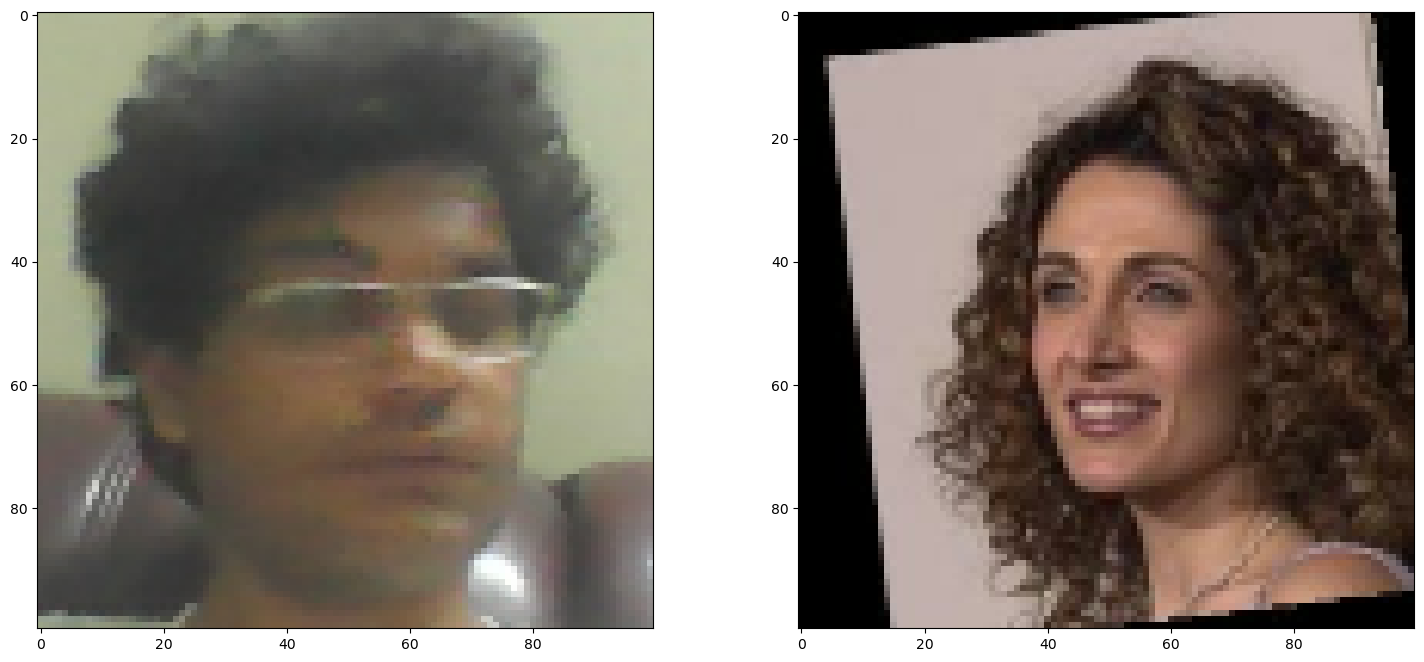

In [186]:
plt.figure(figsize=(18,8))

#Set first sublot
plt.subplot(1,2,1) 
plt.imshow(test_input[8]) #Randomly checking 13th element 

#Set second subplot
plt.subplot(1,2,2) 
plt.imshow(test_val[8]) #Randomly checking 13th element 

plt.show()


- The above result shows -ve. So answer should be 0 which it is: Check 6th element of the the result before 6.3

# 7. Save Model

In [187]:
#Save weights
siamese_model.save('siamesemodelv2.h5')

In [189]:
#Reload model
model = tf.keras.models.load_model('siamesemodelv2.h5', custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [190]:
#Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


array([[4.0998934e-08],
       [1.0000000e+00],
       [9.9999815e-01],
       [4.5720026e-05],
       [1.0000000e+00],
       [2.3139558e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6572305e-05],
       [1.0000000e+00],
       [1.7637686e-07],
       [1.0000000e+00]], dtype=float32)

In [191]:
#View model summary
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_image        │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ anchor_image[0][… │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_6 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# 8. Real Time Test

## 8.1 Verification Function

In [192]:
def verify(model, detection_threshold=0.9999, verification_threshold=0.7):
    try:
        # Build results array
        results = []
        verification_images = os.listdir(os.path.join('application_data', 'verification_images'))

        if not verification_images:
            raise ValueError("No verification images found in the directory!")

        for image in verification_images:
            input_img_path = os.path.join('application_data', 'verification_images', 'input_image.jpg')
            validation_img_path = os.path.join('application_data', 'verification_images', image)

            input_img = preprocess(input_img_path)
            validation_img = preprocess(validation_img_path)

            # Ensure correct shape for model input
            input_img = np.expand_dims(input_img, axis=0)  # Shape: (1, 224, 224, 3)
            validation_img = np.expand_dims(validation_img, axis=0)  # Shape: (1, 224, 224, 3)

            try:
                # Pass as a list of two separate inputs
                result = model.predict([input_img, validation_img])
                results.append(result[0][0])  # Assuming model returns a single value per pair
            except Exception as e:
                print("Model prediction error:", str(e))
                return [], False  

        # Print similarity scores for debugging
        print("Similarity Scores:", results)

        # Detection threshold: Count how many scores exceed the detection threshold
        detection = np.sum(np.array(results) > detection_threshold)
        
        # Verification threshold: Compute verification percentage
        verification = detection / len(verification_images)
        verified = verification > verification_threshold

        print(f"Detected: {detection}, Verification Ratio: {verification}, Verified: {verified}")

        return results, verified

    except Exception as e:
        print("Error in verification:", str(e))
        return [], False


## 8.2 OpenCV Real Time Verification

In [197]:
# Initialize camera
cap = cv2.VideoCapture(0)

try:
    while cap.isOpened():
        ret, frame = cap.read()

        # Check if frame was captured successfully
        if not ret:
            print("Error: Could not read frame from camera.")
            break  # Exit loop instead of crashing

        frame = cv2.flip(frame, 1)
        frame = frame[120:120+250, 200:200+250, :]

        # Verification trigger
        if cv2.waitKey(10) & 0xFF == ord('v'):
            try:
                # Ensure the directory exists
                save_dir = os.path.join('application_data', 'verification_images')
                os.makedirs(save_dir, exist_ok=True)

                # Save the image in the correct location
                file_path = os.path.join(save_dir, 'input_image.jpg')
                cv2.imwrite(file_path, frame)

                # Check if file was saved correctly
                if not os.path.exists(file_path):
                    print(f"Error: Failed to save {file_path}.")
                else:
                    try:
                        # Run verification
                        results, verified = verify(model, 0.99, 0.95)  # Verification and detection thresholds
                        print("Verification Result:", verified)
                    except Exception as e:
                        print(f"Error in verification: {e}")

            except Exception as e:
                print(f"Error saving or processing image: {e}")

        cv2.imshow('Verification', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

except Exception as e:
    print(f"Unexpected error: {e}")

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("Camera released and OpenCV windows closed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/st